In [461]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# Загрузка данных

In [462]:
train = pd.read_csv('../data/raw/train.csv', low_memory=False)
test = pd.read_csv('../data/raw/test.csv', low_memory=False)

In [463]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [464]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


# Train overview

In [465]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Относительно небольшое количество пропусков
### Большинство пропусков будут заполняться нулями, или одним из мер среднего по признаку

In [466]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [467]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### В нашем наборе данных преобладают текстовые данные
### Основной задачей будет преобразовать эти данные таким образом, чтобы количество колонок в датасете не стало слишком большим

# Работа с пропусками

### Monthly_Inhand_Salary - месячный заработок клиента банка
### Как известно, зарпалата распределена так, что большинство людей получают маленькое количество денег, однако, если брать среденее арифметическое в качестве меры, то высокие зарплаты - выбросы - сильно могут повлиять на значение этого среднего
### Проверим мою теорию и посмотрим на распределение зарплат 

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

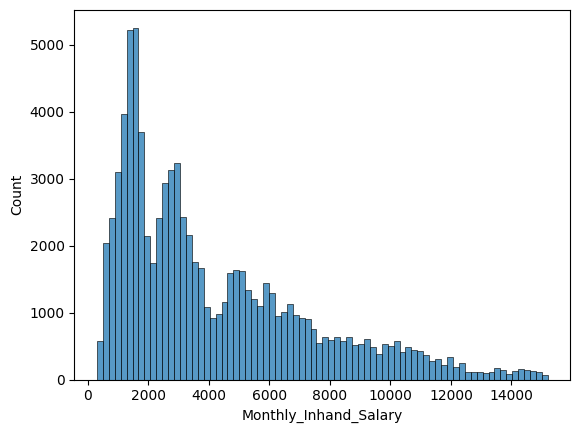

In [468]:
sns.histplot(train['Monthly_Inhand_Salary'])

### Как и ожидалось, распределение похоже на логнормальное, следовательно среднее арифметическое использовать нельзя.
### Сравним различные меры среднего между собой

In [469]:
print('Среднее арифметическое зарплат:', np.mean(train['Monthly_Inhand_Salary'].dropna()).astype(int))
print('Медиана зарплат:', np.median(train['Monthly_Inhand_Salary'].dropna()).astype(int))
print('Мода зарплат:', st.mode(train['Monthly_Inhand_Salary'].dropna().astype(int))[0])

Среднее арифметическое зарплат: 4194
Медиана зарплат: 3093
Мода зарплат: 1480


### Можем заметить, что все значения различаются достаточно сильно. 
### Возможно это связано с различной вилкой зарпалат у разных профессий. Посмотрим медианную и среднюю зарпалту у каждой профессии

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Occupation'>

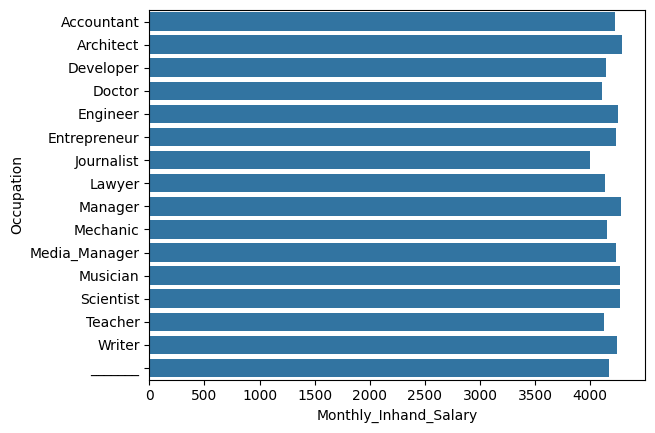

In [470]:
sns.barplot(y=train.groupby('Occupation')['Monthly_Inhand_Salary'].mean().index, x=train.groupby('Occupation')['Monthly_Inhand_Salary'].mean())

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Occupation'>

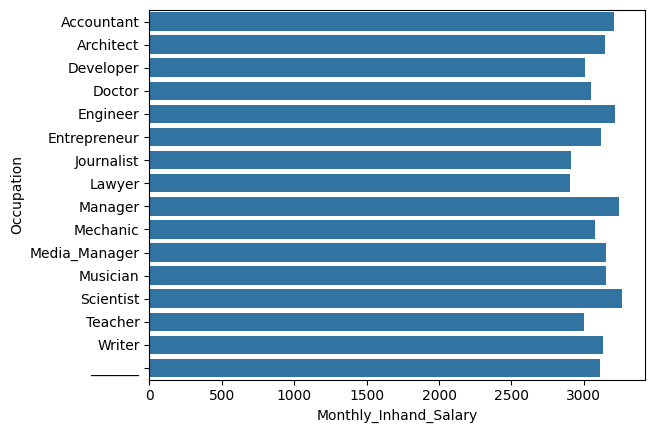

In [471]:
sns.barplot(y=train.groupby('Occupation')['Monthly_Inhand_Salary'].median().index, x=train.groupby('Occupation')['Monthly_Inhand_Salary'].median())

### Медиана и среднее у разных профессий не различают, следовательно можно использовать медиану в качестве значения, которое будет стоять на месте пропусков в колонке с зарплатой
### Также приведет начение колонки к целым числам, чтобы не работать с дробными числами

In [472]:
train['Monthly_Inhand_Salary'] = train['Monthly_Inhand_Salary'].fillna(np.median(train['Monthly_Inhand_Salary'].dropna())).astype(int)

### Type_of_Loan - цель займа

In [473]:
train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

### Самой популярной целью является 'Без определенной цели', что, как по мне, является идеальным значениям для заполнения пропусков

In [474]:
train['Type_of_Loan'] = train['Type_of_Loan'].fillna(train['Type_of_Loan'].value_counts().index[0])

### Num_of_Delayed_Payment - Количество просроченных выплат 
### Этот признак потенциально может испортить кредитный рейтинг клиента, так что заполнять пропуски какими-либо значениями помимо нуля, если мы не знаем количество просроченных выплат, не стоит

In [475]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(0)

### Num_Credit_Inquiries - Количество запросов по кредитным картам 
### Credit_History_Age - Количество лет с момента первого кредита
### Amount_invested_monthly - Представляет собой ежемесячную сумму, инвестированную клиентом
### Monthly_Balance - Cредняя месячная сумма на балансе клиента
### Так же заполняем пропуски нулями, так как мы ничего не знаем о этих признаках клиента 

In [476]:
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(0)
train['Credit_History_Age'] = train['Credit_History_Age'].fillna(0)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

### Name - Имя клиента
### Можно заметить, что у нас существует целых 3 колонки, по которым можно идентефицировать клиента - Customer_ID, Name и SSN. Я предлагаю удалить признак, в котором записано имя клиента, так как мы и без него сможем определить какому пользователю принадлежит запрос. Таким образом мы уменьшим размер матрицы признаком и не будет впослдествие тратить мощности на то, что бы заполнять пропуски в этой колонке

In [477]:
train = train.drop('Name', axis=1)

# Преобразования признаков

### Как я и писал раньше, мы можем определить конкретного юзера по разным признаком. Предлагаю оставить исключительно признак SSN

In [478]:
train = train.drop(['ID', 'Customer_ID'], axis=1)

### Так же удалим колонку Type_of_Loan, так как ее неудобно обрабатывать

In [479]:
train = train.drop('Type_of_Loan', axis=1)

### Приведем тип данных оставшихся численных признаков к int или float

In [480]:
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')

<Axes: xlabel='Amount_invested_monthly', ylabel='Count'>

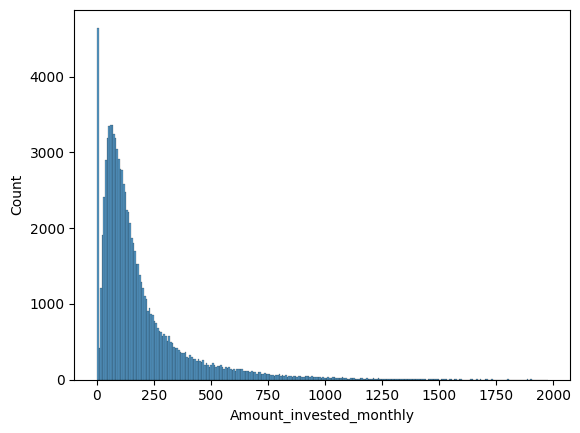

In [481]:
sns.histplot(train['Amount_invested_monthly'])

### Заметим, что большинство людей не инвестируют ни единой копейки, так что мы заполним пропуски именно этим значение

In [482]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(st.mode(train['Amount_invested_monthly'])[0])

### При заполнение пропусков в колонке со средним балансом каждый месяц мы, фактически, заполняем не пустые значения, а некорректные, так что можем использовать в качестве меры среднего медиану

In [483]:
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(train['Monthly_Balance'].median())

### В остальных примерах такая же ситуация. Мы заполняем пропуски, на месте которых изначально стояли некорректные значения, а не пустые

In [484]:
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Annual_Income'] = train['Annual_Income'].fillna(train['Annual_Income'].median())

In [485]:
train['Credit_History_Age'] = train['Credit_History_Age'].map(lambda x: int(str(x)[0:2]))

In [486]:
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train['Num_of_Loan'] = train['Num_of_Loan'].fillna(train['Num_of_Loan'].median())

In [487]:
train["Age"] = pd.to_numeric(train["Age"], errors="coerce")
train['Age'] = train['Age'].fillna(train['Age'].median())

In [488]:
train['Outstanding_Debt'] = pd.to_numeric(train["Outstanding_Debt"], errors="coerce")
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(train['Outstanding_Debt'].median())

### В колонках с просроченными платежами же стоит заполнить пропуски, образовавшиеся после приведения к вещественному, нулями

In [489]:
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(0)

### Процентное изменение лимитов по кредитной карте, в свою очередь, можно заполнить медианным значением, отражающим среднее поведение большинства людей

In [490]:
train["Changed_Credit_Limit"] = pd.to_numeric(train["Changed_Credit_Limit"], errors="coerce")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(train['Changed_Credit_Limit'].median())

# Преобразуем категориальные колонки

In [491]:
train['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [492]:
map_table = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

train['Month'] = train['Month'].replace(map_table)

In [493]:
train['Payment_Behaviour'] = train['Payment_Behaviour'].map(lambda x: 'unknown' if x == '!@9#%8' else x)

### Количество уникальных значений признака, показывающего работу, слишком большое что бы применять OHE, а MeanTargetEncoding нельзя использовать во время инференса, так что я использую похожу на преобразование месяцев схему

In [494]:
train['Occupation'] = train['Occupation'].map(lambda x: 'unknown' if x == '_______' else x)

In [495]:
occupation_map_table = {k: v for v, k in enumerate(train['Occupation'].unique())}

In [496]:
train['Occupation'] = train['Occupation'].replace(occupation_map_table)

### А вот признак, показывающий была ли выплачена лицом только минимальная сумма, идеально подходит для OHE

In [497]:
train = pd.concat((train.drop('Payment_of_Min_Amount', axis=1), pd.get_dummies(train['Payment_of_Min_Amount'], dtype=int)), axis=1)

### Так же как и фича, отражающая платежное поведение клиента

In [498]:
train = pd.concat((train.drop('Payment_Behaviour', axis=1), pd.get_dummies(train['Payment_Behaviour'], dtype=int)), axis=1)

### Произведем те же операции и с средним кредитным рейтингом по предыдущим запросам

In [503]:
train['Credit_Mix'] = train['Credit_Mix'].map(lambda x: 'NoData' if x == '_' else x)

In [505]:
train = pd.concat((train.drop('Credit_Mix', axis=1), pd.get_dummies(train['Credit_Mix'], dtype=int)), axis=1)